Accuracy: 0.9356
Precision: 0.7652
Recall: 0.9428


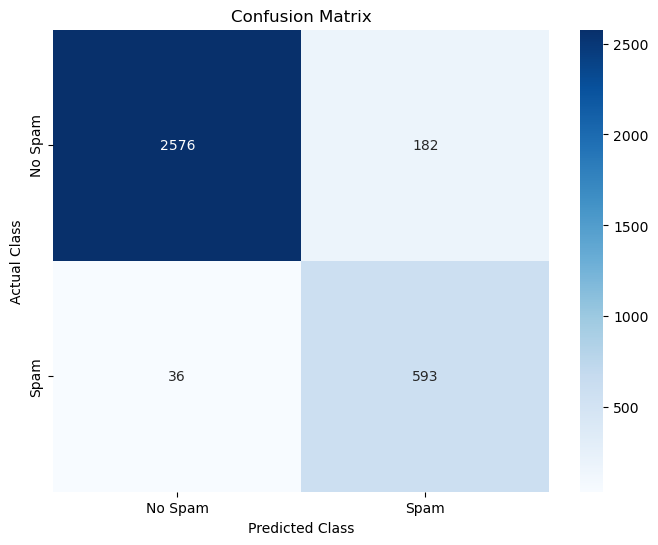

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.pipeline import make_pipeline


data = pd.read_csv("../Data/Preprocessing/data_cooked.csv")
data = data.dropna(subset=['Message']) #without this I get an error for missing values in training data (wonder why)

data.head()

X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['Category'], test_size=0.3, random_state=42)


#using a pipeline can connect multiple steps:
pipeline = make_pipeline(
    CountVectorizer(),  # creates a matrix with word counts
    MultinomialNB()     # the classifier from scikit
)

#train
pipeline.fit(X_train, y_train)

#make predictions
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:,1]  


#test and evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Spam', 'Spam'], yticklabels=['No Spam', 'Spam'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()
